<a href="https://colab.research.google.com/github/knobs-dials/wetsuite-dev/blob/main/notebooks/intro/using_dataset_kamervragen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# (only) in colab, run this first to install wetsuite from (the most recent) source.   For your own setup, see wetsuite's install guidelines.
!pip3 install -U --no-cache-dir --quiet https://github.com/knobs-dials/wetsuite-dev/archive/refs/heads/main.zip

# Purpose of this notebook

Give a brief introduction to the contents of the structured `kamervragen` dataset.

In [2]:
import collections
import wetsuite.datasets

kamervragen = wetsuite.datasets.load('tweedekamer-kamervragen-struc')

Downloaded    256KiB  [                                                  ]

Downloaded     66MiB  [==================================================]
Decompressing... 606MiB    


In [3]:
len( kamervragen.data )

38247

In [4]:
print(kamervragen.description)


    Questions from members of the parliament (tweede kamer) to the government.

    Source: Officiele publicaties, specifically the ah-tk documents (aanhangsels, tweede kamer), as fetched from the KOOP repositories,
    and further restricted to the documents that actually contain answers 
    (so ignoring documents that are only the questions, or only the questions and a note that they will be answered later).

    The structure of .data looks something like:
       {'ah-tk-20102011-2857': {
            'identifier': 'ah-tk-20102011-2857',
            'urls':   [ 'https://repository.overheid.nl/frbr/officielepublicaties/ah-tk/20102011/ah-tk-20102011-2857/1/metadata/metadata.xml',
                        'https://repository.overheid.nl/frbr/officielepublicaties/ah-tk/20102011/ah-tk-20102011-2857/1/xml/ah-tk-20102011-2857.xml',
                        ... 
                      ],
            'issued':       '2011-06-17',
            'available':    '2011-06-23',
            'vergaderj

# Extract some questions and answers

In [9]:
import textwrap, random

doc_id, details = kamervragen.data.random_choice()

print(f'==== {doc_id} ====')
for question_number, question_and_answer in details['vraagdata'].items():
    # note that these will be [plaintext, xmlfragment] # TODO improve this
    question = question_and_answer['vraag']
    answer   = question_and_answer['antwoord']

    if question and answer:
        # just print them in a somewhat nice-looking format:
        q_wrapped = '\n'.join(textwrap.wrap(question[0], subsequent_indent='        '))
        a_wrapped = '\n'.join(textwrap.wrap(answer[0], subsequent_indent='        '))
        print(f'Q{question_number: <5}  {q_wrapped}\nA{question_number: <5}  {a_wrapped}\n')


==== ah-tk-20142015-2458 ====
Q1      Kent u de berichten «Stad klaar met tunnelmalaise»  en «Rover: maat is
        vol met treinstoringen Schiphol»?
A1      Ja.

Q2      Klopt de berichtgeving dat gemiddeld dertig keer per maand het verkeer
        voor de Coentunnel stilstaat vanwege een te hoge vrachtwagen?
        Zo nee, hoe vaak zijn er in het afgelopen kwartaal dan
        stremmingen ontstaan voor de Coentunnel, van welke duur zijn
        deze en wat zijn hiervan de oorzaken? In hoeverre is dit een
        toename of afname in vergelijking met kwartaal één in 2014?
A2      Het verkeer voor de Coentunnel staat tussen de 25 en 30 keer per week
        stil als gevolg van een te hoge vrachtwagen. Het betreft dus
        een hoger aantal. Er is geen vergelijking mogelijk omdat in
        het eerste kwartaal van 2014 alleen de nieuwe Tweede
        Coentunnel in gebruik was. De gerenoveerde Eerste Coentunnel
        is juli 2014 geopend. Het aantal keren dat een hoogtemelding
    

# What does the metadata look like?

In [10]:
import pandas   # pandas is a nice way to inspect and alter tabular data
df = pandas.DataFrame.from_dict(kamervragen.data, orient='index')
df

,urls,identifier,type,available,category,indiener,ontvanger,vergaderjaar,vraagdata,issued
ah-tk-20022003-1391-h1,[https://repository.overheid.nl/frbr/officiele...,ah-tk-20022003-1391-h1,"[officiële publicatie, Antwoord, Aanhangsel va...",2009-07-01,Internationaal | Defensie,[Koenders],[De Hoop Scheffer],2002-2003,{},NaN
ah-tk-20022003-486,[https://repository.overheid.nl/frbr/officiele...,ah-tk-20022003-486,"[officiële publicatie, Antwoord, Aanhangsel va...",2002-12-31,Onderwijs en wetenschap | Onderzoek en wetenschap,[De Pater-van der Meer],[De Boer],2002-2003,{},NaN
ah-tk-20072008-1362,[https://repository.overheid.nl/frbr/officiele...,ah-tk-20072008-1362,"[officiële publicatie, Antwoord, Aanhangsel va...",2008-03-03,Verkeer | Spoor,"[Samsom, Roefs]","[Huizinga-Heringa, Eurlings]",2007-2008,{},NaN
ah-tk-20082009-2635,[https://repository.overheid.nl/frbr/officiele...,ah-tk-20082009-2635,"[officiële publicatie, Antwoord, Aanhangsel va...",2022-03-09,NaN,[Sterk W.R.C.],NaN,2008-2009,{'1': {'vraag': ['Bent u bekend met het artike...,NaN
ah-tk-20082009-3385-n1,[https://repository.overheid.nl/frbr/officiele...,ah-tk-20082009-3385-n1,"[officiële publicatie, Antwoord, Aanhangsel va...",2011-04-28,Internationaal | Organisatie en beleid,[Dam van M.H.P.],[Verhagen M.J.M.],2008-2009,{'1': {'vraag': ['Bent u bekend met het berich...,2009-08-03
...,...,...,...,...,...,...,...,...,...,...
ah-tk-20232024-94,[https://repository.overheid.nl/frbr/officiele...,ah-tk-20232024-94,"[officiële publicatie, Antwoord, Aanhangsel va...",2023-09-28,Natuur en milieu | Energie,[S.P.A. Erkens],[R.A.A. Jetten],2023-2024,{'1': {'vraag': ['Bent u bekend met het berich...,2023-09-28
ah-tk-20232024-95,[https://repository.overheid.nl/frbr/officiele...,ah-tk-20232024-95,"[officiële publicatie, Antwoord, Aanhangsel va...",2023-09-28,Migratie en integratie | Tijdelijk verblijf,[A. Podt],[E. van der Burg],2023-2024,{'1': {'vraag': ['Kunt u verklaren waarom de i...,2023-09-28
ah-tk-20232024-97,[https://repository.overheid.nl/frbr/officiele...,ah-tk-20232024-97,"[officiële publicatie, Antwoord, Aanhangsel va...",2023-09-28,Zorg en gezondheid | Organisatie en beleid,[J.P. Dijk],[E.J. Kuipers],2023-2024,{'1': {'vraag': ['Wat is uw reactie op het ber...,2023-09-28
ah-tk-20232024-98,[https://repository.overheid.nl/frbr/officiele...,ah-tk-20232024-98,"[officiële publicatie, Antwoord, Aanhangsel va...",2023-09-28,Financiën | Organisatie en beleid,"[E.J. Slootweg, M. Amhaouch]",[S.A.M. Kaag],2023-2024,{'1': {'vraag': ['Heeft u kennisgenomen van he...,2023-09-28


In [11]:
df['category'].value_counts()

Zorg en gezondheid | Organisatie en beleid                          2862
Openbare orde en veiligheid | Criminaliteit                         1536
Internationaal | Organisatie en beleid                              1476
Openbare orde en veiligheid | Organisatie en beleid                 1315
Openbare orde en veiligheid | Politie, brandweer en hulpdiensten     888
                                                                    ... 
Recht | Bestuursrecht                                                 18
Migratie en integratie | Emigratie                                    17
Sociale zekerheid | Nabestaanden                                      14
Economie | Toerisme                                                   12
Werk | Levensloop                                                      9
Name: category, Length: 111, dtype: int64

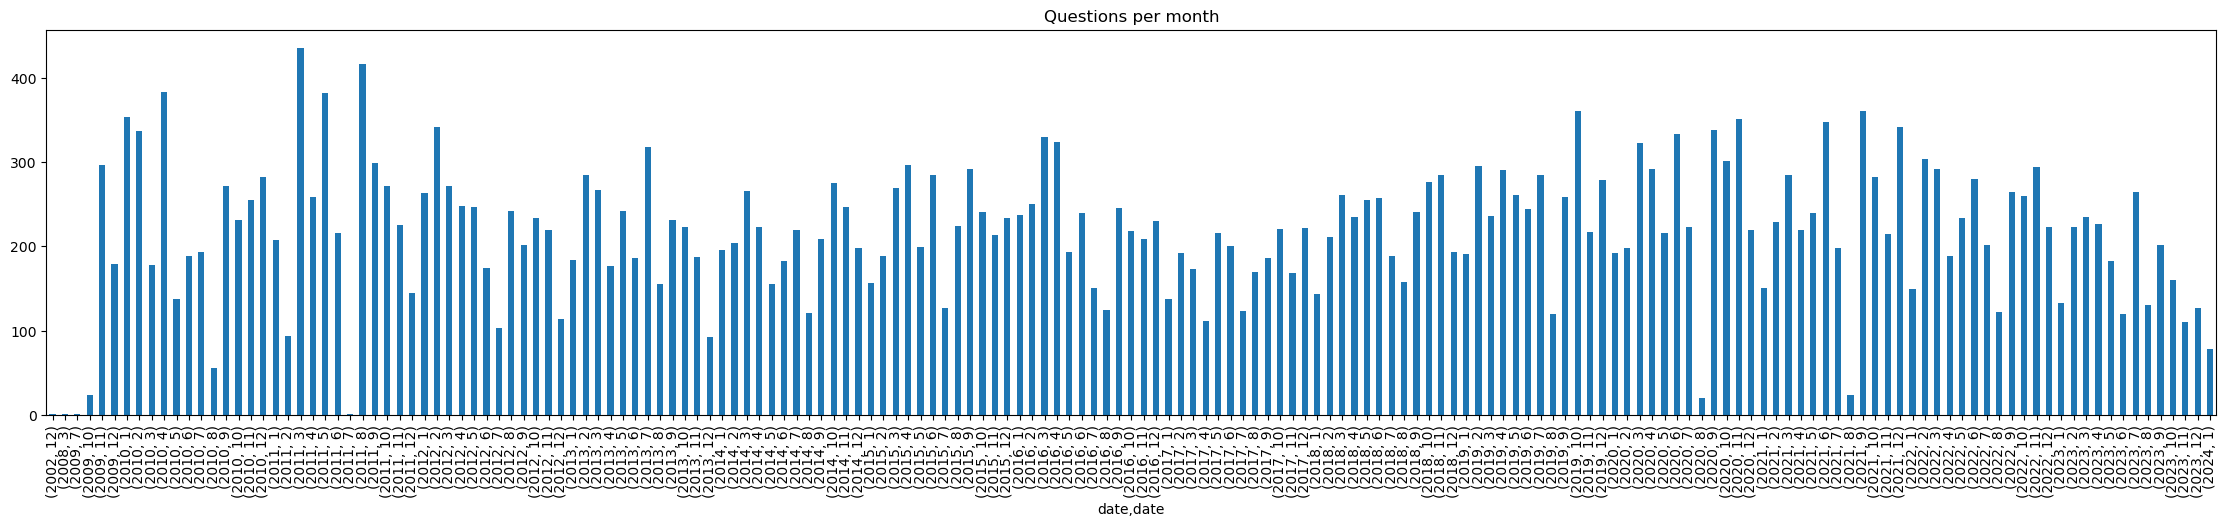

In [12]:
df['date'] = pandas.to_datetime(df['available'])
df['date'].groupby(
    [df["date"].dt.year, df["date"].dt.month]
).count().plot(kind="bar", figsize=(28,5), title='Questions per month')
# CONSIDER: nicer month names

### Digging a little deeper: Question and answer numbering

If we approach this as a data scientist, we want to know how good our data is,
by inspecting it and intentionally looking for flaws.

For example, through more inspection, we have noticed that questions get answered together.

If we want to match questions with answers, that matters to how we treat the data,
so let's do some basic counting to indicate how often that's done:

In [13]:
count_questions = collections.defaultdict(int)

for id, details in list(kamervragen.data.items()):
    # within this set of questions...
    vraagdata = details['vraagdata']
    # each one those vraagdata items is question-and-or-answer-numbers -> dict with details, so:
    for qa_number, qa_details in vraagdata.items():
        count_questions[ qa_number ] += 1

# sort by the numbering-like string
for qa_number, count in sorted( count_questions.items(), key=lambda x:x[1], reverse=True ):
    print( f'count:{count:<5d}    for {repr(qa_number)}' )

count:33727    for '1'
count:28261    for '2'
count:26629    for '3'
count:26411    for '4'
count:24613    for '5'
count:20885    for '6'
count:16948    for '7'
count:13206    for '8'
count:10063    for '9'
count:7716     for '10'
count:5816     for '11'
count:4510     for '12'
count:3422     for '13'
count:3004     for '2 3'
count:2722     for '14'
count:2133     for '3 4'
count:2128     for '15'
count:1973     for '4 5'
count:1631     for '16'
count:1574     for '5 6'
count:1486     for '1 2'
count:1311     for '17'
count:1262     for '6 7'
count:1065     for '18'
count:1053     for '2 3 4'
count:903      for '7 8'
count:876      for '19'
count:752      for '20'
count:692      for '8 9'
count:599      for '21'
count:573      for '3 4 5'
count:556      for '1 2 3'
count:515      for '9 10'
count:493      for '22'
count:445      for '4 5 6'
count:427      for '23'
count:360      for '24'
count:341      for '10 11'
count:338      for ''
count:336      for '5 6 7'
count:324      for '2 4

It looks like the bulk is likely singular question and answers, great.

Yet there's a also a good amount of grouping going on -- and some messy and weird cases, particularly near the bottom.

Also, we might suspect there may be some mismatches in there,
e.g. where questions were separate but answers were joined, e.g. 
because they could easily be answered at the same time.

Again, if we want to match questions with answers, that matters to how we treat the data,
so let's see how often the question and answer seems to mismatch, by looking at each case individually.

In [14]:
count_matched_qa, count_mismatched_qa = 0,0

for id, details in list(kamervragen.data.items()):
    # within this set of questions...
    vraagdata = details['vraagdata']

    # what questions and answer numbers are there?
    vraag_numbers    = set()   # We choose a set in part because out of the box they they have a 
    antwoord_numbers = set()   #   "what are the difference between these?" function

    # previously we only recorded the string with number. 
    #  Now we also care about whether they belonged to a question, or an answer answer
    for qa_number in vraagdata:
        if 'vraag' in vraagdata[qa_number]:
            vraag_numbers.add( qa_number )

        if 'antwoord' in vraagdata[qa_number]:
            antwoord_numbers.add( qa_number )

        
        present_in_just_one = vraag_numbers.symmetric_difference( antwoord_numbers )
        if len(present_in_just_one) == 0: # the numbers match
            count_matched_qa    += 1
        else: 
            count_mismatched_qa += 1

            # Present_in_just_one is a new set that will show the actual mismatch.
            # Most of the time that will resemble something like set(['1 2', '1', '1']).
            # Showing all differencse would be very spammy, but if you care about further inspection, 
            #   you probably want to do that:
            if False:  # by changing that to True
                print('\n=== %s ==='%id)
                print("Vragen:     %s"%sorted(vraag_numbers))
                print("Antwoorden: %s"%sorted(antwoord_numbers))
                print("Difference: %s"%sorted(present_in_just_one))
                print( details['urls'][-1] )  # mention the document we used, so we can look at it

print( f"Matched: {count_matched_qa}     Not matched: {count_mismatched_qa}" )

Matched: 251273     Not matched: 13062


tl;dr: 
- ~95% matches and over 200K items probably already great for linguists who want a bulk of topical question-answer data to work on.
- complete analysis might care to figure out at least some of the rest, particularly if it turns out there are some half-answered or non-answered cases in there. We don't know, we haven't looked yet - some of that would be manual work.